In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from __future__ import division, print_function

In [2]:
def plot_polynomial(xmin, xmax, coef,
                    yfunc=(lambda y:y),
                    color='C1'):
    """Plot a polynomial with coefficients given in coef,
    optionally apply a function `yfunc` to the y values."""
    #xs is an array of evenly spaced numbers between xmin and xmax
    xs = np.linspace(xmin, xmax, num=500)
    
    #ys is an array, each element is computed as a polynomial function of
    #the corresponding element of xs
    ys = np.zeros_like(xs)
    for p, c in enumerate(coef.flatten()):
        ys += c*np.power(xs, p)
    plt.plot(xs, yfunc(ys), color=color)

## Easy example:

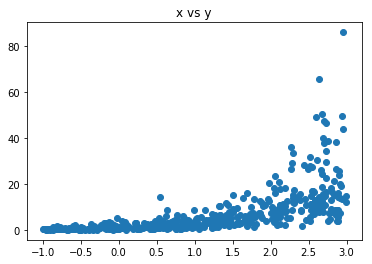

In [4]:
# Generate some data with horrible heteroscedasticity,
m = 500
x = np.random.uniform(-1, 3, size=m)
y = np.exp(x + np.random.normal(scale=0.7, size=m))

# Plot x vs y
plt.scatter(x, y); plt.title("x vs y"); plt.show() 

### Horrible heteroscedasticity :((
### Maybe outliers :((



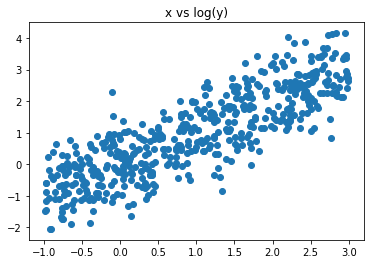

In [4]:
# simply plot x vs log(y)
plt.scatter(x, np.log(y)); plt.title("x vs log(y)"); plt.show()

### Use log(y) instead,
### Now this looks perfectly suited for linear regression
### The outlier problem is gone as well

# Another example:

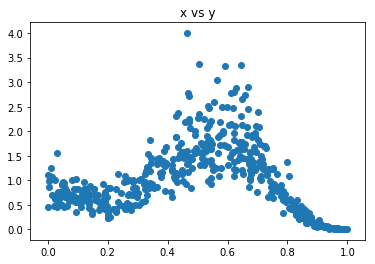

In [5]:
# Generate some data with heteroscedasticity,
# looking similar to the example in class
m = 500
x = np.random.uniform(size=m)
y = np.exp(-30*((x - 0.75)*(x-0.35)*x + np.random.normal(scale=0.01, size=m)))

# Plot x vs y
plt.scatter(x, y); plt.title("x vs y"); plt.show()

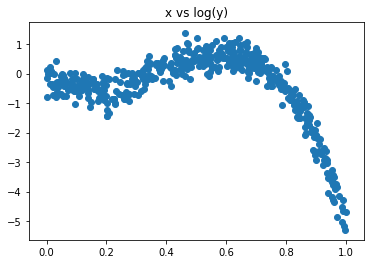

In [6]:
# Now transform y by log function, plot x vs log(y)
# The y-variance looks the same for all x values
# So we can now apply polynomial regression to this
plt.scatter(x, np.log(y)); plt.title("x vs log(y)"); plt.show()

In [7]:
# Doing regression using normal equation:
X = np.concatenate([a.reshape([m,1]) for a in [np.power(x,i) for i in [0, 1, 2, 3]]],
                  axis=1)
#X = np.concatenate([np.ones_like(x).reshape([m,1]), x.reshape([m,1])], axis=1)
logy = np.log(y).reshape([m,1])
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(logy)
theta

array([[ 7.41758190e-04],
       [-8.39762079e+00],
       [ 3.45086233e+01],
       [-3.11139843e+01]])

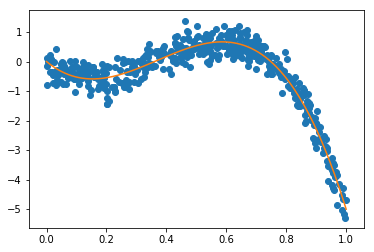

In [8]:
# plot x vs log(y) along with the polynomial curve whose coefficients in theta
plt.scatter(x, logy)
plot_polynomial(0, 1, theta)
plt.show()

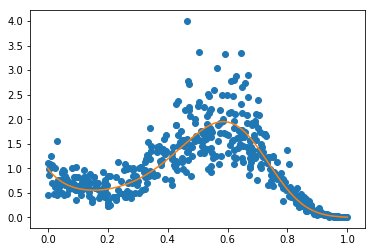

In [9]:
# plot x vs y along with the above polynomial curve with exp function applied
plt.scatter(x, y)
plot_polynomial(0, 1, theta, yfunc=np.exp)
plt.show()